In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [7]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##data preproccesing

In [8]:
data.shape

(7920, 3)

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [12]:
import re
import string

convert uppercase to lowercase

In [13]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [14]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(x.lower() for x in x.split() ))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [16]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags= re.MULTILINE)for x in x.split()))

In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuation

In [18]:
def remove_puntuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_puntuation)

In [19]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [20]:
data["tweet"] = data["tweet"].str.replace(r'\d+','',regex=True)

In [21]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [22]:
!pip install nltk

In [23]:
import nltk
nltk.download('stopwords', download_dir= '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [25]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [26]:
data["tweet"] = data["tweet"].apply(lambda x : " ".join(x for x in x.split() if x not in sw))

In [27]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    completely love new iphone emojis iphone apple...
7912    tune turn drop gtd one app mobile mind meditat...
7913    ok galaxy crashed one day wait til monday skyr...
7914    gain followers rt must follow follow back foll...
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

stemming

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [29]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [30]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [31]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


vocablary building

In [32]:
from collections import Counter
VoCab = Counter()

In [33]:
VoCab

Counter()

In [34]:
for sentence in data["tweet"]:
    VoCab.update(sentence.split())

In [35]:
VoCab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [36]:
len(VoCab)

15949

In [37]:
data.shape

(7920, 3)

In [38]:
tokens = [key for key in VoCab if VoCab[key] > 10]

In [39]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [40]:
len(tokens)

1145

In [41]:
def save_vocablary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocablary(tokens, '../static/model/vocabulary.txt')

divide dataset for testing and training

In [42]:
x = data["tweet"]
y = data["label"]

In [43]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [44]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [45]:
!pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2 )

In [47]:
X_train

4492              lost contact pleas text name want angri
3850    credit love tool art googl websit خطعربي iphon...
630     follow capetownsup instagram sup surf fun cape...
4832    im go kill katiewertheimerr hatey pleasestop i...
4394    cant wait new comput monitor arriv ankermann s...
                              ...                        
1169    new k video katchafir perform live mangawhai n...
7059    good dinosaur cinema sonyxperiaz soni thegoodd...
4323    applestor liverpool broken power pack test swa...
254     rt genevievermrz pictur smileykidd tenni today...
2682    final got macbook air appl photobooth pj selfp...
Name: tweet, Length: 6336, dtype: object

In [48]:
X_test

4645    abl tweet make check twitter pictwittercompfbj...
6291    like share want fast charger iphon iphon sa …p...
4944    cute set iphon case luvocraci iphon appl case ...
4684    feel fanci lol instap life samsung june cali o...
678      fuck appl product suck ipod instagram instadaili
                              ...                        
4540    appl purpos slow iphon get peopl upgrad iphon ...
1253    michel came home tcot nascar theater movi sing...
2375    charg ipad readi comic con play minut famili g...
4922    pc exquisit squishi random charm iphon strap t...
3230    pickup line gener iphon app webapp fun onlinec...
Name: tweet, Length: 1584, dtype: object

In [49]:
Y_train

4492    1
3850    0
630     0
4832    0
4394    0
       ..
1169    0
7059    0
4323    0
254     0
2682    1
Name: label, Length: 6336, dtype: int64

In [50]:
Y_test

4645    0
6291    0
4944    0
4684    0
678     0
       ..
4540    1
1253    0
2375    1
4922    0
3230    0
Name: label, Length: 1584, dtype: int64

vectorization

In [51]:
def vectorization(dataset, vocabulary):
    vectorized_list = []
    for sentence in dataset:  # Fixed typo in variable name 'sentece'
        sentence_list = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1  # Fixed: assign 1 to specific position
        vectorized_list.append(sentence_list)
    # Moved return statement outside the loop and fixed indentation
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [52]:
vectorized_x_train = vectorization(X_train, tokens)

In [53]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [54]:
vectorized_x_test = vectorization(X_test, tokens)

In [55]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [56]:
Y_train

4492    1
3850    0
630     0
4832    0
4394    0
       ..
1169    0
7059    0
4323    0
254     0
2682    1
Name: label, Length: 6336, dtype: int64

In [57]:
Y_test

4645    0
6291    0
4944    0
4684    0
678     0
       ..
4540    1
1253    0
2375    1
4922    0
3230    0
Name: label, Length: 1584, dtype: int64

In [58]:
Y_train.value_counts()

label
0    4731
1    1605
Name: count, dtype: int64

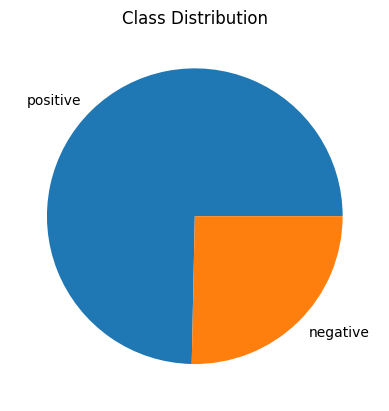

In [59]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), 
        labels=['positive', 'negative'])
plt.title('Class Distribution')
plt.show()

Handle Inbalance in dataset

In [60]:
!pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train,Y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9462, 1145) (9462,)


In [63]:
y_train_smote.value_counts()

label
1    4731
0    4731
Name: count, dtype: int64

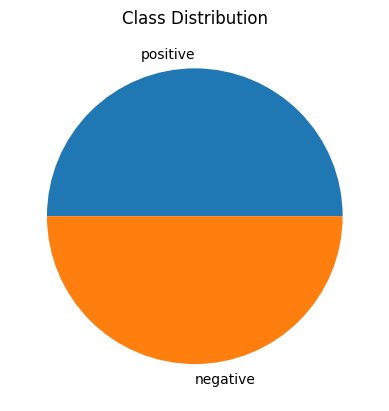

In [65]:
    plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), 
        labels=['positive', 'negative'])
plt.title('Class Distribution')
plt.show()

In [66]:
y_train_smote

0       1
1       0
2       0
3       0
4       0
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [67]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9462, 1145), dtype=float32)

In [68]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [70]:
Y_test

4645    0
6291    0
4944    0
4684    0
678     0
       ..
4540    1
1253    0
2375    1
4922    0
3230    0
Name: label, Length: 1584, dtype: int64

model training and evaluation